In [1]:
from analysis import *

file_paths = {0: 'single_classification_22/45540945/',
              1: 'single_classification_42/45539118/', 
              2: 'single_regression_2/45540957/',
              3: 'single_regression_11/45540958/',
              4: 'multi_classification_3/45550779/',
              5: 'multi_classification_7/45555017/',
              6: 'result_FP_ROCAUC_5fold/',
              7: 'result_FP_EFR1_5fold/'}

number = 20

evaluations = {0: 'train prec', 1: 'train roc', 2: 'train bedroc',
               3: 'val prec', 4: 'val roc', 5: 'val bedroc',
               6: 'test prec', 7: 'test roc', 8: 'test bedroc',
               9: 'EF_2', 10: 'EF_1', 11: 'EF_015', 12: 'EF_01'}

paths = ['../../output/cross_validation/{}'.format(p) for p in file_paths.values()]
model_list = ['single_classification_22',
              'single_classification_42',
              'single_regression_2',
              'single_regression_11',
              'multi_classification_3',
              'multi_classification_7',
              'light_chen_ROC',
              'light_chem_EF1']

In [2]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
for k in range(7):
    print 'Check ', file_paths[k]
    check_result_completeness(dir_='../../output/cross_validation/', file_path=file_paths[k], number=number)
    print

Check  single_classification_22/45540945/
All output result complete.

Check  single_classification_42/45539118/
All output result complete.

Check  single_regression_2/45540957/
All output result complete.

Check  single_regression_11/45540958/
All output result complete.

Check  multi_classification_3/45550779/
All output result complete.

Check  multi_classification_7/45555017/
All output result complete.

Check  result_FP_ROCAUC_5fold/
All output result complete.



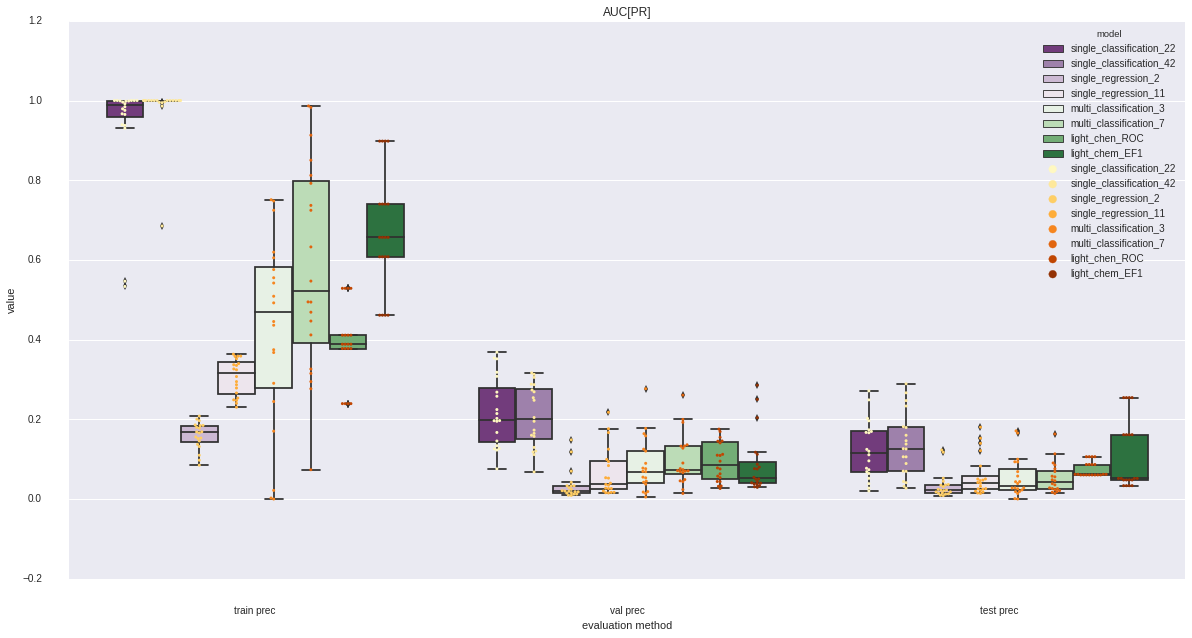

In [5]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[0], evaluations[3], evaluations[6]],
                      model_list=model_list,
                      title='AUC[PR]')

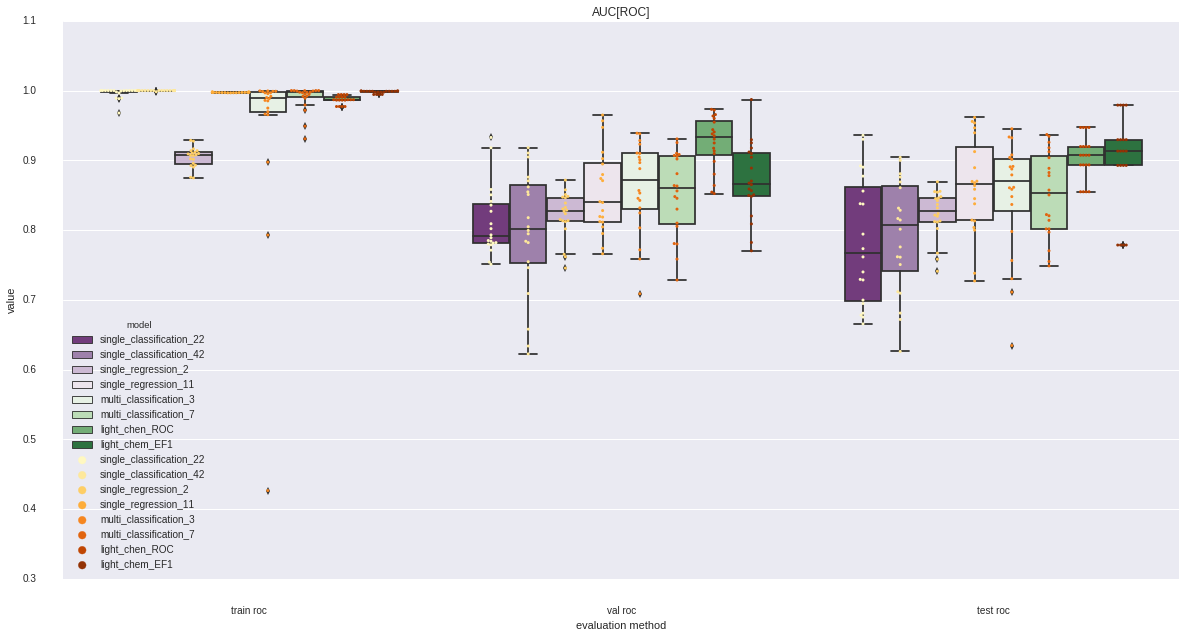

In [6]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[1], evaluations[4], evaluations[7]],
                      model_list=model_list,
                      title='AUC[ROC]')

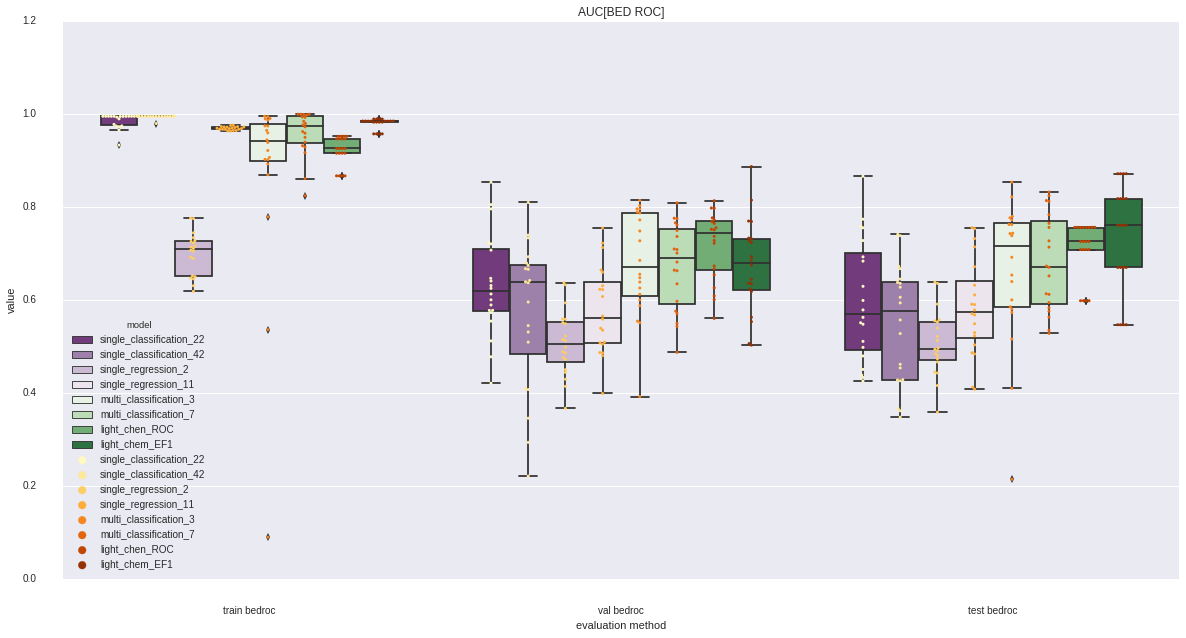

In [7]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[2], evaluations[5], evaluations[8]],
                      model_list=model_list,
                      title='AUC[BED ROC]')

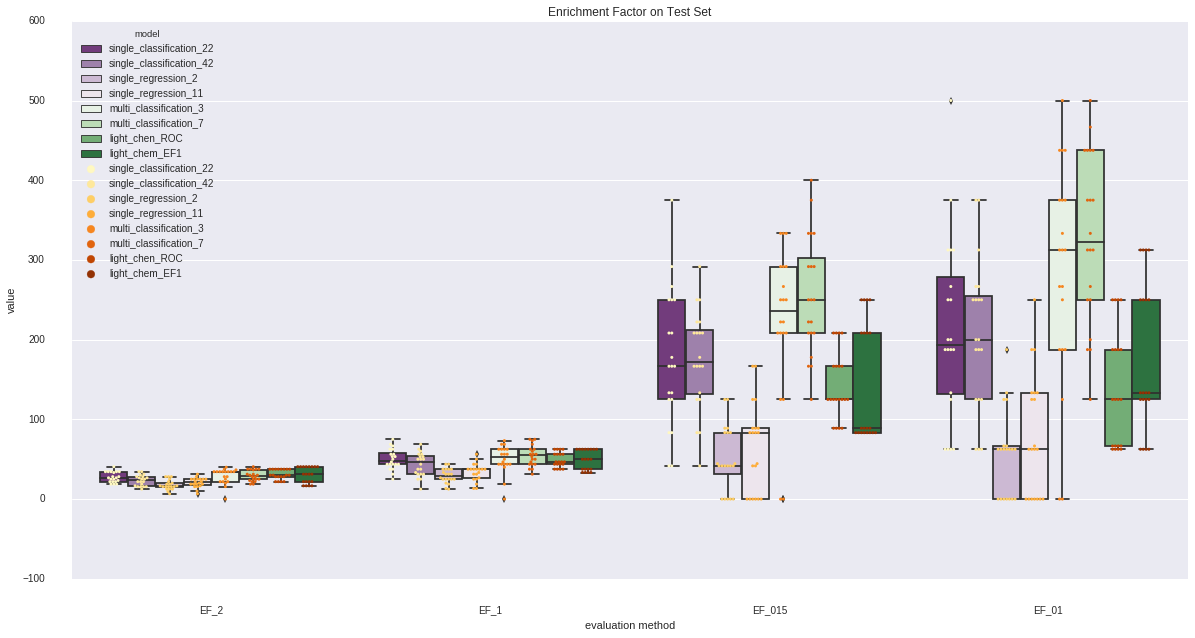

In [8]:
plot_cross_validation(paths,
                      evaluation_list=[evaluations[9], evaluations[10], evaluations[11], evaluations[12]],
                      model_list=model_list,
                      title='Enrichment Factor on Test Set')

# Get EF curve

In [9]:
from EF_curve_support import *

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 30.0)

Using Theano backend.
Using gpu device 0: Tesla K40m (CNMeM is disabled, CuDNN 4004)


In [10]:
json_file_list = ['single_classification_22.json',
                  'single_classification_42.json',
                  'single_regression_2.json',
                  'single_regression_11.json',
                  'multi_classification_3.json',
                  'multi_classification_7.json']

json_paths = ['../../output/cross_validation/{}'.format(p) for p in json_file_list]
print json_paths

weights_dir_paths = ['../../output/cross_validation/single_classification_22/45540945/',
                     '../../output/cross_validation/single_classification_42/45539118/',
                     '../../output/cross_validation/single_regression_2/45540957/',
                     '../../output/cross_validation/single_regression_11/45540958/',
                     '../../output/cross_validation/multi_classification_3/45550779/',
                     '../../output/cross_validation/multi_classification_7/45555017/']

model_names_list = model_list

['../../output/cross_validation/single_classification_22.json', '../../output/cross_validation/single_classification_42.json', '../../output/cross_validation/single_regression_2.json', '../../output/cross_validation/single_regression_11.json', '../../output/cross_validation/multi_classification_3.json', '../../output/cross_validation/multi_classification_7.json']


In [11]:
EF_ratio_list = np.linspace(0.001, 0.15, 100)

data_pd_0 = get_EF_curve_in_pd(EF_ratio_list=EF_ratio_list,
                               config_json_file=json_paths[0],
                               weight_dir=weights_dir_paths[0],
                               model_name=model_names_list[0],
                               regenerate=False)

In [12]:
data_pd_1 = get_EF_curve_in_pd(EF_ratio_list=EF_ratio_list,
                               config_json_file=json_paths[1],
                               weight_dir=weights_dir_paths[1],
                               model_name=model_names_list[1],
                               regenerate=False)

In [13]:
data_pd_2 = get_EF_curve_in_pd(EF_ratio_list=EF_ratio_list,
                               config_json_file=json_paths[2],
                               weight_dir=weights_dir_paths[2],
                               model_name=model_names_list[2],
                               regenerate=False)

In [14]:
data_pd_3 = get_EF_curve_in_pd(EF_ratio_list=EF_ratio_list,
                               config_json_file=json_paths[3],
                               weight_dir=weights_dir_paths[3],
                               model_name=model_names_list[3],
                               regenerate=False)

In [15]:
data_pd_4 = get_EF_curve_in_pd(EF_ratio_list=EF_ratio_list,
                               config_json_file=json_paths[4],
                               weight_dir=weights_dir_paths[4],
                               model_name=model_names_list[4],
                               regenerate=False)

In [16]:
data_pd_5 = get_EF_curve_in_pd(EF_ratio_list=EF_ratio_list,
                               config_json_file=json_paths[5],
                               weight_dir=weights_dir_paths[5],
                               model_name=model_names_list[5],
                               regenerate=False)

In [17]:
whole_pd = data_pd_0
whole_pd = whole_pd.append(data_pd_1)
whole_pd = whole_pd.append(data_pd_2)
whole_pd = whole_pd.append(data_pd_3)
whole_pd = whole_pd.append(data_pd_4)
whole_pd = whole_pd.append(data_pd_5)

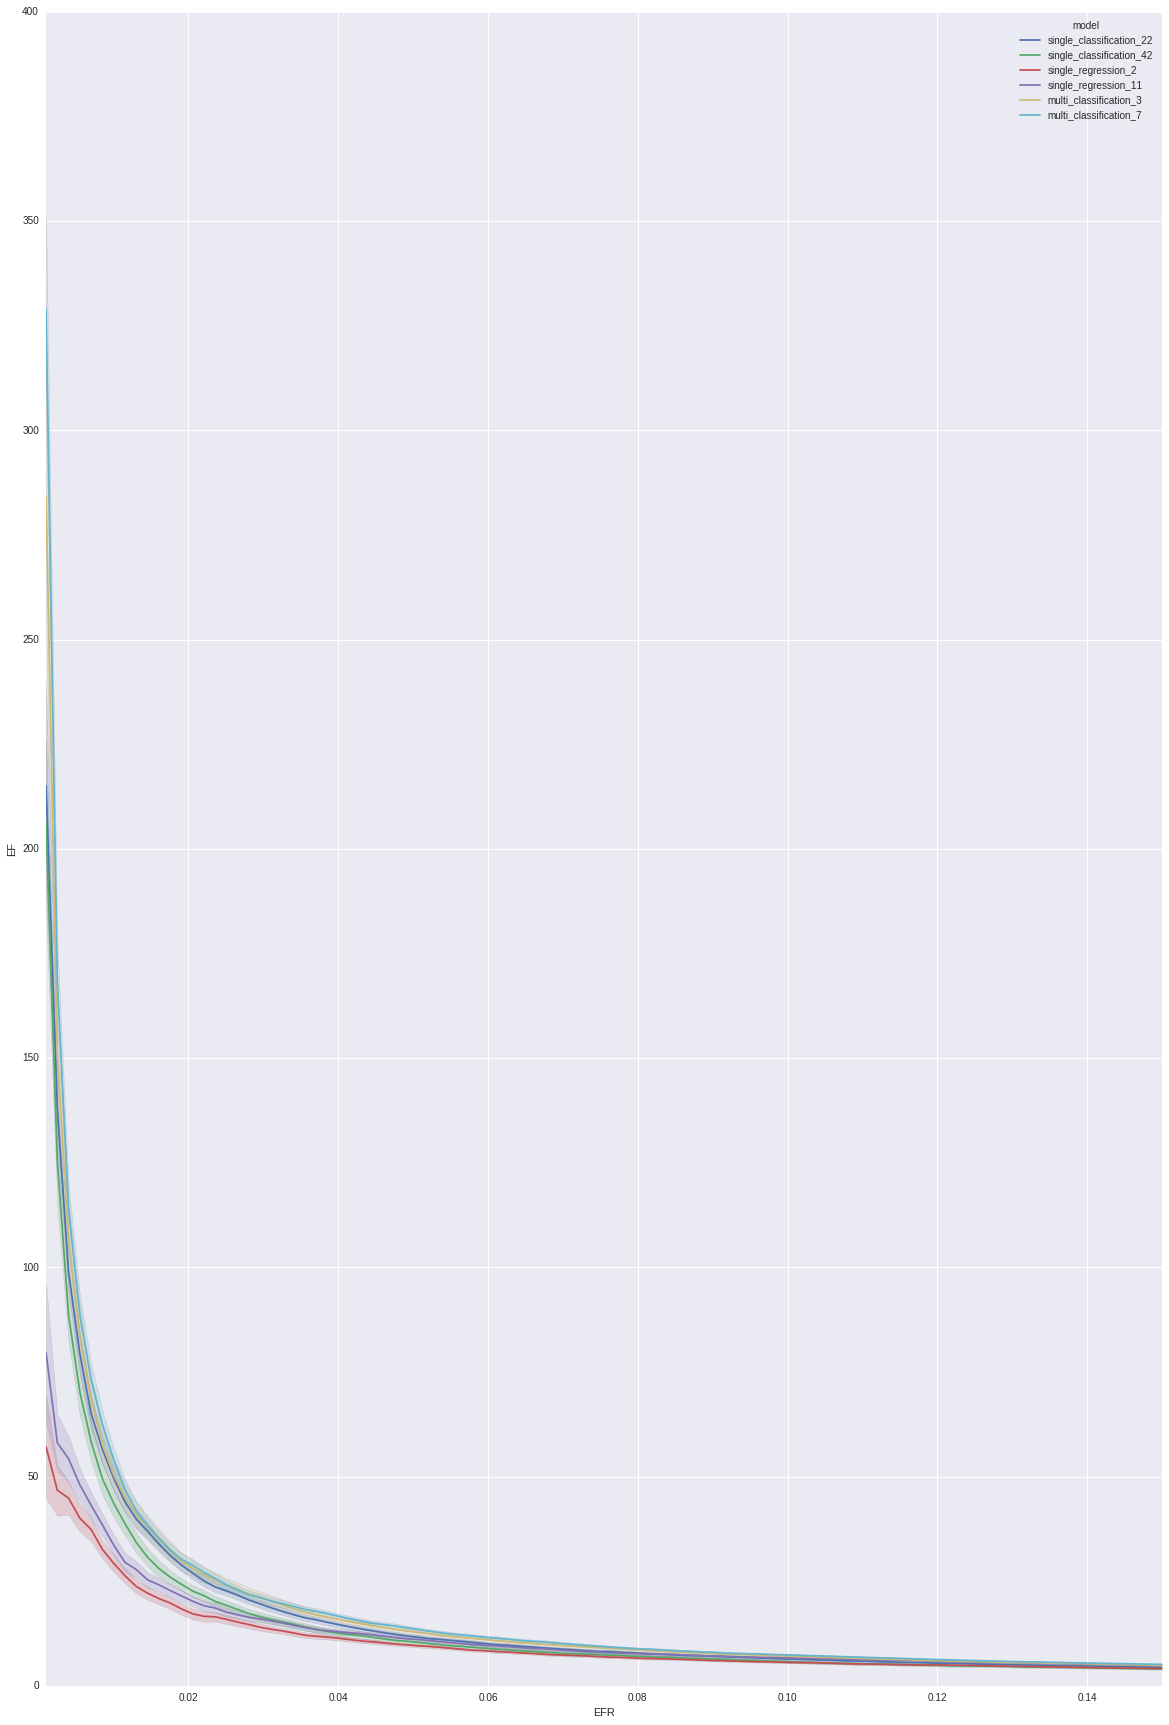

In [18]:
sns.tsplot(data=whole_pd, time="EFR", unit="running process", condition="model", value="EF")